# Bitcoin fraud detection Sven Fassaert (500828460) & Nusret Kaya (500916106)

We're implementing code for Bitcoin fraud detection using the Elliptic dataset. Our process involves data cleaning, exploratory analysis, and feature engineering. We'll train multiple machine learning models, following methods outlined in a relevant paper. We'll evaluate model performance and document our work in this Python notebook. Our aim is to find the best model to detect bitcoin fraud

In [6]:
import numpy as np # NumPy is a fundamental package for numerical computing in Python. It provides support for arrays, matrices, and mathematical functions, making it essential for data manipulation and analysis.
import pandas as pd # Pandas is a powerful data analysis library in Python. It offers data structures and operations for manipulating numerical tables and time series, making it invaluable for data preprocessing and analysis.
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, interactive, and animated visualizations in Python. It provides functionalities for generating plots, histograms, scatter plots, etc., facilitating data visualization tasks.
import seaborn as sns # Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, enhancing the aesthetics of visualizations.
from scipy import stats # SciPy is a scientific computing library that builds upon NumPy. It offers additional functionality compared to NumPy, including statistical tests, optimization, interpolation, and integration, useful for various scientific computing tasks.
import networkx as nx  # NetworkX is a Python library for the creation, manipulation, and study of complex networks or graphs. It provides tools for generating, analyzing, and visualizing network structures, facilitating network-related tasks in data analysis and modeling.
import plotly.graph_objects as go # Plotly is an interactive plotting library that allows for creating and sharing interactive, web-based plots. Plotly Graph Objects provides a low-level interface for building custom plots and visualizations with high interactivity and flexibility.
from sklearn.model_selection import train_test_split # Scikit-learn is a machine learning library in Python that provides simple and efficient tools for data mining and data analysis. train_test_split is a function used to split datasets into training and testing subsets, essential for model evaluation and validation.
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is an ensemble learning method for classification tasks. It constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
from sklearn.metrics import precision_recall_fscore_support #This module from scikit-learn provides functions for evaluating the precision, recall, F1 score, and support of a classification model. These metrics are crucial for assessing the performance of classification models, particularly in binary or multiclass classification tasks.

In [7]:
# Loading the dataset into a Pandas DataFrames
dfClasses = pd.read_csv("D:/Gebruikers/Vic/Documents/Sven/bitcoin/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
dfEdgelist= pd.read_csv("D:/Gebruikers/Vic/Documents/Sven/bitcoin/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
dfFeatures= pd.read_csv("D:/Gebruikers/Vic/Documents/Sven/bitcoin/elliptic_bitcoin_dataset/elliptic_txs_features.csv")

In [8]:
#Check the first few rows of the dataset
dfClasses.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
...,...,...
203764,173077460,unknown
203765,158577750,unknown
203766,158375402,1
203767,158654197,unknown


We observe that the data has been loaded successfully, and it contains classes labeled as 1, 2, and unknown.

In [9]:
#Check the first few rows of the dataset
dfClasses.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


We observe that the data has been loaded successfully.

In [10]:
#Check the first few rows of the dataset
dfFeatures.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


We observe that the data has been loaded successfully.

In [11]:
#This code renames the columns of the DataFrame dfFeatures to include identifiers 'id' and 'time', as well as columns labeled 'local_0' to 'local_92' and 'aggregate_0' to 'aggregate_71', and then displays the first few rows of the DataFrame.
dfFeatures.columns = ['id', 'time'] + [f'local_{i}' for i in range(93)] + [f'aggregate_{i}' for i in range(72)]
dfFeatures.head()

,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,local_7,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [12]:
#Check the shape of the datasets.
dfClasses.shape, dfEdgelist.shape, dfFeatures.shape


((203769, 2), (234355, 2), (203768, 167))

The shape of the datasets is checked, revealing that dfClasses has dimensions (203769, 2), dfEdgelist has dimensions (234355, 2), and dfFeatures has dimensions (203768, 167).

## 2. Merging the data and checking if anything need to be cleaned

In [13]:
#Check for missing values in the datasets.
dfClasses.isnull().sum().sum()
dfEdgelist.isnull().sum().sum()
dfFeatures.isnull().sum().sum()

0

In [14]:
#Check the distribution of the target classes in the dataset.
dfFeatures.columns = ['id', 'time'] + [f'local_{i}' for i in range(93)] + [f'aggregate_{i}' for i in range(72)]
dfFeatures.head()

,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,local_7,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [16]:
#Merge Class and features.
df_class_feature = pd.merge(dfClasses, dfFeatures, left_on='txId', right_on='id', how='left')
df_class_feature.head()

,txId,class,id,time,local_0,local_1,local_2,local_3,local_4,local_5,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
0,230425980,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5530458,unknown,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,unknown,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,unknown,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [17]:
#Count the nan values in the dataset.
nan_count = df_class_feature.isna().sum()
print("Number of NaN values per column:", nan_count)

Number of NaN values in 'aggregate_0' column: txId            0
class           0
id              1
time            1
local_0         1
               ..
aggregate_67    1
aggregate_68    1
aggregate_69    1
aggregate_70    1
aggregate_71    1
Length: 169, dtype: int64


In [18]:
#Drop the rows with NaN values.
df_class_feature = df_class_feature.dropna()

In [19]:
#Check datatypes.
dfFeatures.dtypes

id                int64
time              int64
local_0         float64
local_1         float64
local_2         float64
                 ...   
aggregate_67    float64
aggregate_68    float64
aggregate_69    float64
aggregate_70    float64
aggregate_71    float64
Length: 167, dtype: object

In [20]:
#Show the dataset.
dfFeatures.describe()

,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,local_7,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
count,2.037680e+05,203768.000000,2.037680e+05,2.037680e+05,203768.000000,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,...,203768.000000,203768.000000,203768.000000,203768.000000,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05
mean,1.711307e+08,23.844073,8.414927e-07,9.062637e-07,0.000006,5.985709e-07,2.153162e-07,5.545621e-07,3.022251e-07,7.954968e-07,...,0.000003,0.000003,-0.000007,-0.000007,-8.970692e-08,4.293616e-07,6.436502e-07,4.786011e-07,5.919153e-07,5.878865e-07
std,1.104656e+08,15.172123,1.000005e+00,1.000005e+00,1.000001,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000004,1.000004,1.000000,1.000000,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-0.577099,-0.626229,-0.979074,-0.978556,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433451e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-0.569626,-0.594691,-0.979074,-0.978556,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624374e+08,23.000000,-1.692045e-01,-1.328975e-01,0.463609,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-0.479951,-0.455928,0.241128,0.241406,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318532e-01,-5.524241e-02,1.018602,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355929e-01,...,0.155250,0.121274,1.305483,1.398764,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520490e-01,1.199793e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953,7.914041,1.461330,1.461369,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [21]:
# Group by 'time' column
grouped = dfFeatures.groupby('time')

# Count the occurrences of 'id' within each group
id_counts = grouped['id'].count()
id_counts

time
1     7879
2     4544
3     6621
4     5693
5     6803
6     4328
7     6048
8     4457
9     4996
10    6727
11    4296
12    2047
13    4528
14    2022
15    3639
16    2975
17    3385
18    1976
19    3506
20    4291
21    3537
22    5894
23    4165
24    4592
25    2314
26    2523
27    1089
28    1653
29    4275
30    2483
31    2816
32    4525
33    3151
34    2486
35    5507
36    6393
37    3306
38    2891
39    2760
40    4481
41    5342
42    7140
43    5063
44    4975
45    5598
46    3519
47    5121
48    2954
49    2454
Name: id, dtype: int64

In [22]:
#Show the dataset.
df_class_feature

,txId,class,id,time,local_0,local_1,local_2,local_3,local_4,local_5,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
1,5530458,unknown,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,unknown,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,unknown,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,230459870,unknown,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,unknown,173077460.0,49.0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,158577750,unknown,158577750.0,49.0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,158375402,1,158375402.0,49.0,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,158654197,unknown,158654197.0,49.0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


## conclusion

The data is now mostly clean and ready for further actions. 

## 3. Split the DataFrame to extract the test set, ensuring it remains untouched within the original DataFrame.

In [23]:
# Splitting the data in to the most equally distributed classes.
# Splitting the datset df_class_feature into training and testing dataset based on time 0-34 is training and 35-49 is testing.
# Splitting the datset df_class_feature into training and testing dataset based on time 0-32 is training and 33-42 is testing en 43-49 is testing.
train = df_class_feature[df_class_feature['time'] <= 32]
test = df_class_feature[(df_class_feature['time'] > 32) & (df_class_feature['time'] <= 42)]
train2 = df_class_feature[(df_class_feature['time'] > 42) & (df_class_feature['time'] <= 49)]

# Add train and train2 together to df train.
train = pd.concat([train, train2])

# Splitting the training dataset into features and target.
X_train = train.drop(['class'], axis=1)
y_train = train['class']

#Drop class 'unknown' from the test dataset.
test = test[test['class'] != 'unknown']
X_test = test.drop([ 'class', 'time'], axis=1)

#Split the test dataset into features and target.
y_test = test['class']

In [24]:
#Check the distribution of the target classes in the training dataset.
y_test.value_counts(normalize=True)

class
2    0.910961
1    0.089039
Name: proportion, dtype: float64

In [25]:
#Check the distribution of the target classes in the training dataset.
y_train.value_counts(normalize=True)

class
unknown    0.777776
2          0.199949
1          0.022275
Name: proportion, dtype: float64

In [26]:
#Check the distribution of the target classes in the test dataset.
y_test = y_test[y_test != 'unknown']
y_test.value_counts(normalize=True)


class
2    0.910961
1    0.089039
Name: proportion, dtype: float64

In [27]:
#Merge X_train and y_train to create a training dataset.
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()


,txId,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
1,5530458,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown
5,230459870,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,unknown


In [28]:
#Check data types
dfEdgelist.dtypes

txId1    int64
txId2    int64
dtype: object

In [29]:
#Check data types
dfClasses.dtypes

txId      int64
class    object
dtype: object

## conclusion

The data is now split, allowing the test dataset to be kept separate and unaffected, ensuring our models can be properly validated on the test set.

## 4. Data Visualization

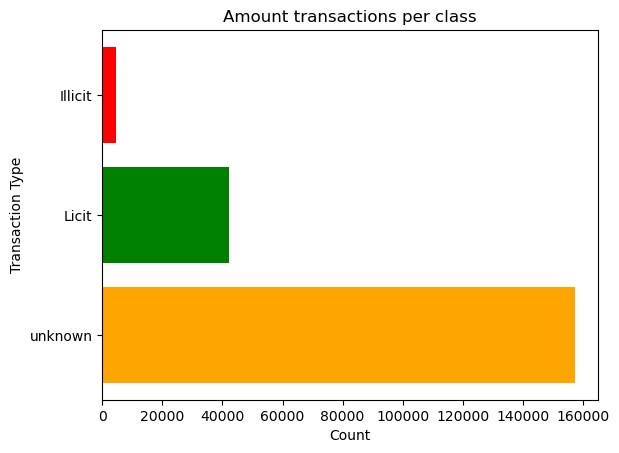

In [30]:
import matplotlib.pyplot as plt

# Define color mappings for classes
color_map = {'unknown': 'orange', '1': 'red', '2': 'green'}

#Create a DataFrame with the counts of the classes
class_counts = dfClasses['class'].value_counts().to_dict()

#Define new y-axis labels.
new_y_labels = ['Unknown', 'Illicit', 'Licit']

#Make a list of the counts of the classes.
original_y_labels = list(class_counts.keys())

#Replace the original y-axis labels with the new ones.
new_original_y_labels = [label if label != '1' else 'Illicit' for label in original_y_labels]
new_original_y_labels = [label if label != '2' else 'Licit' for label in new_original_y_labels]

#Plot the bar chart with the new y-axis label
plt.barh(new_original_y_labels, list(class_counts.values()), color=[color_map[label] for label in original_y_labels])
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.title('Amount transactions per class')
plt.show()


1. Illicit Transactions: There are a small number of transactions labeled as illicit (red bar), which indicates that within the data represented, the count of illicit transactions is quite low compared to the other categories.

2. Licit Transactions: The count of transactions labeled as licit (green bar) is larger than that of illicit transactions but is still significantly less than the unknown category.

3. Unknown Transactions: The unknown category (orange bar) has the highest count by a large margin. This suggests that for a considerable number of transactions, the classification into licit or illicit could not be determined or has not been done.

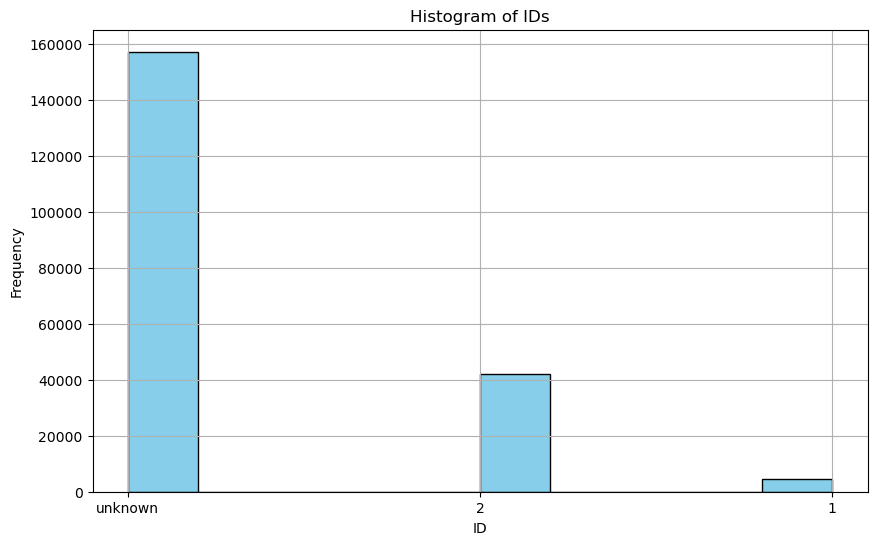

In [31]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_class_feature['class'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.title('Histogram of IDs')
plt.grid(True)
plt.show()

It's evident that the largest class is the unknown class. Furthermore, we observe that we indeed have more licit transactions than illicit ones.

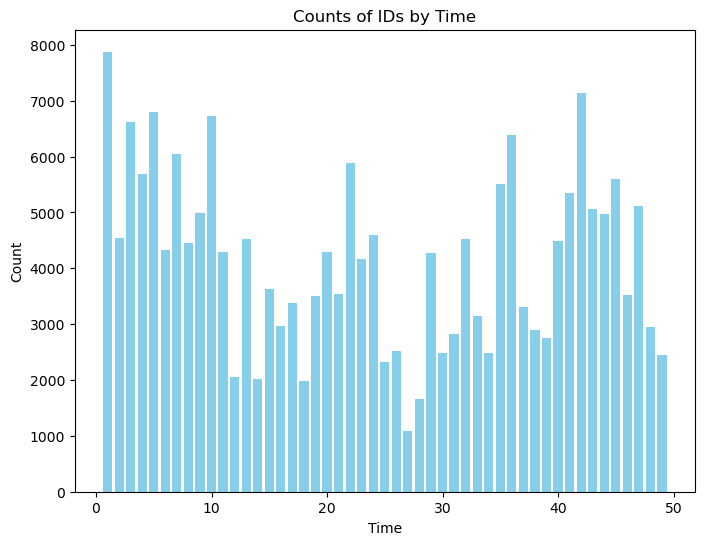

In [32]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(id_counts.index, id_counts.values, color='skyblue')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Counts of IDs by Time')
plt.show()

This bar chart presents the counts of IDs over a period labeled as "Time" on the x-axis, which is divided into intervals that run from 0 to 50.

1. Fluctuation in Counts: The counts of IDs vary significantly across different time intervals. This indicates that the occurrence of these IDs is not constant over time but fluctuates.

2. Peaks and Troughs: There are noticeable peaks and troughs throughout the time intervals. For example, the highest peak appears near the start and another high peak appears near the end of the time intervals shown.

3. Overall Trend: There does not seem to be a clear overall upward or downward trend. Instead, the chart shows a pattern that could be cyclic or random, indicating possible periodic activity or a lack of consistent trends in the data.

4. Time Periods with High Activity: There are specific intervals where the count of IDs is significantly higher than in others. This could suggest periods of high activity that may correspond to specific events or behaviors associated with these IDs.

5. Lower Activity Periods: Similarly, there are time intervals where the counts are relatively low, indicating periods of lower activity.

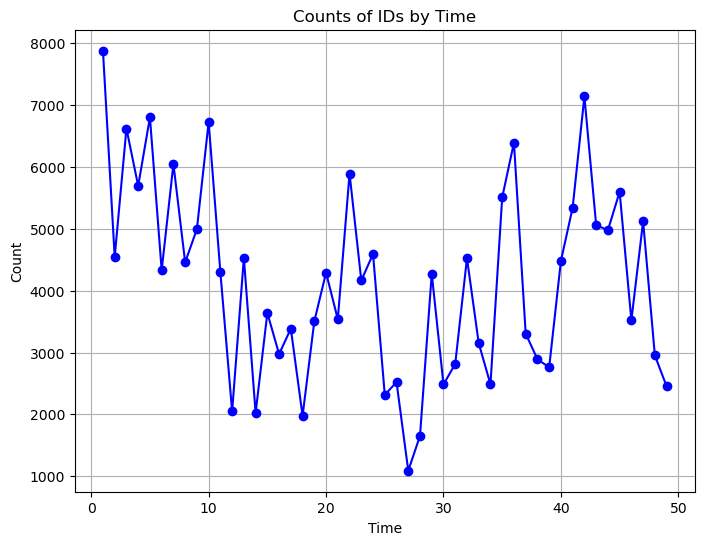

In [33]:
#Different plot of counts of id by time.
plt.figure(figsize=(8, 6))
plt.plot(id_counts.index, id_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Counts of IDs by Time')
plt.grid(True)
plt.show()

In [34]:
#Show the dataset.
df_train

,txId,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
1,5530458,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown
5,230459870,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,173077460.0,49.0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
203765,158577750,158577750.0,49.0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,unknown
203766,158375402,158375402.0,49.0,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203767,158654197,158654197.0,49.0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,unknown


In [35]:
#Rename dataset and replace unknown with 0.
classes_features = df_train
classes_features.head()
classes_features['class'] = classes_features['class'].replace('unknown', 0).astype(int)

In [36]:
#Check the dataset.
classes_features.head()

,txId,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
1,5530458,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
2,232022460,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
3,232438397,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
5,230459870,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0


c:\Users\Vic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Vic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


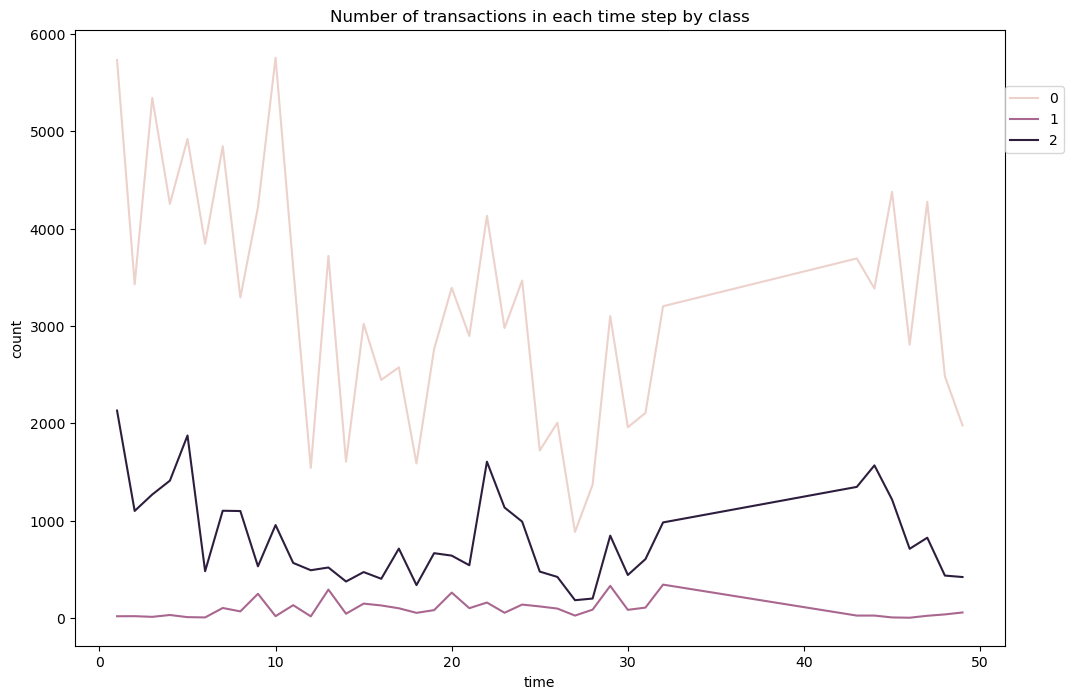

In [37]:
#Plot the number of transactions in each time step by class.
plt.figure(figsize=(12, 8))
group = classes_features.groupby(['time', 'class'])['id'].count().reset_index().rename(columns={'id': 'count'})
sns.lineplot(x='time', y='count', hue='class', data=group);
plt.legend(loc=(1.0, 0.8));
plt.title('Number of transactions in each time step by class');

The plot illustrates a higher proportion of unknown transactions compared to the rest, with peaks and troughs evident, such as between time steps 20 and 30.

In [38]:
#Show the proportion of each class in the dataset.
df_class_feature.groupby('class').size()

class
1            4545
2           42019
unknown    157204
dtype: int64

In [39]:
#Count the number of illicit unknown and licit transactions.
count_by_class = df_class_feature[["time",'class']].groupby(['time','class']).size().to_frame().reset_index()
illicit_count = count_by_class[count_by_class['class'] == '1']
licit_count = count_by_class[count_by_class['class'] == '2']
unknown_count = count_by_class[count_by_class['class'] == "unknown"]

In [40]:
#Original code
tx_features = ["tx_feat_"+str(i) for i in range(2, 95)]
agg_features = ["agg_feat_"+str(i) for i in range(1, 73)]

# Let's check the length of the existing columns and the new column labels.
print("Current number of columns:", len(df_class_feature.columns))
print("Expected number of columns:", len(["txId", "class", "id", "time"] + tx_features + agg_features))

#Check the  columns in the DataFrame and their names
print("Existing columns:", df_class_feature.columns)

#Ensure that all columns are correctly named and accounted for in the new column labels.
df_class_feature.columns = ["txId", "class", "id", "time"] + tx_features + agg_features

# Check if the length matches now
print("New number of columns:", len(df_class_feature.columns))

Current number of columns: 169
Expected number of columns: 169
Existing columns: Index(['txId', 'class', 'id', 'time', 'local_0', 'local_1', 'local_2',
       'local_3', 'local_4', 'local_5',
       ...
       'aggregate_62', 'aggregate_63', 'aggregate_64', 'aggregate_65',
       'aggregate_66', 'aggregate_67', 'aggregate_68', 'aggregate_69',
       'aggregate_70', 'aggregate_71'],
      dtype='object', length=169)
New number of columns: 169


In [42]:
#Plot the distribution of the target classes in the dataset per time step.
import plotly.graph_objects as go
import plotly.io as pio

x_list = list(range(1,50))

fig = go.Figure(data = [
    go.Bar(name="Unknown", x=x_list, y=unknown_count[0], marker=dict(color='rgba(120, 100, 180, 0.6)',
                                                                   line=dict(color='rgba(120, 100, 180, 1.0)', width=1))),
    go.Bar(name="Licit", x=x_list, y=licit_count[0], marker=dict(color='rgba(246, 78, 139, 0.6)',
                                                                 line=dict(color='rgba(246, 78, 139, 1.0)', width=1))),
    go.Bar(name="Illicit", x=x_list, y=illicit_count[0], marker=dict(color='rgba(58, 190, 120, 0.6)',
                                                                     line=dict(color='rgba(58, 190, 120, 1.0)', width=1)))
])

fig.update_layout(barmode='stack')
pio.show(fig)

The bars are color-coded with Unknown in purple, Licit in pink, and Illicit in green. For each category (1 through 49), the total count is divided among the three classifications. The height of each colored section of the bars represents the count of each classification.

conclusions:

1. For almost every category represented on the x-axis, the Unknown count is the highest, followed by Licit, and then Illicit.
2. There seems to be some variability in the counts across the categories, with some having higher overall counts and others lower.
3. The Unknown counts seem to be quite consistent across categories, with a few exceptions where it dips or peaks.
4. The Licit and Illicit counts show more variability than the Unknown counts. Some categories have higher Licit counts and others have higher Illicit counts, but generally, the Licit counts appear larger than the Illicit ones.

In [44]:
# Count the number of NaN values in each column
na_counts = classes_features.isna().sum()

# Total number of NaN values
total_na_count = na_counts.sum()

# Print the number of NaN values for each column
print("Number of NaN values in each column:")
print(na_counts)

# Print the total number of NaN values
print("\nTotal number of NaN values in df_local:", total_na_count)

Number of NaN values in each column:
txId            0
id              0
time            0
local_0         0
local_1         0
               ..
aggregate_68    0
aggregate_69    0
aggregate_70    0
aggregate_71    0
class           0
Length: 169, dtype: int64

Total number of NaN values in df_local: 0


In [45]:
#Making sure that the dataset is clean.
classes_features = classes_features.dropna()

## conclusion

There is an uneven distribution of classes in the dataset. 

## 5. Correlation

The correlation in this dataset lacks a clear visualization; refer to the conclusion for an overall conclusion of this chapter.

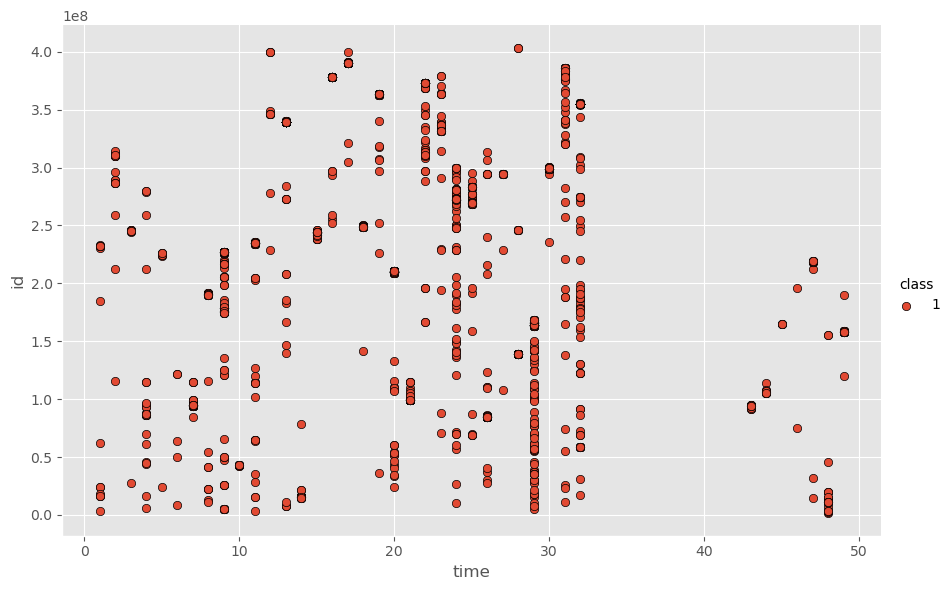

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Filter the data to exclude Class 2
filtered_data = classes_features[(classes_features["class"] != 0) & (classes_features["class"] != 2)]
# Create a larger FacetGrid
grid = sns.FacetGrid(filtered_data, hue="class", height=6, aspect=1.5)
grid.map(plt.scatter, "time", "id", edgecolor="k").add_legend()

plt.show()


c:\Users\Vic\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



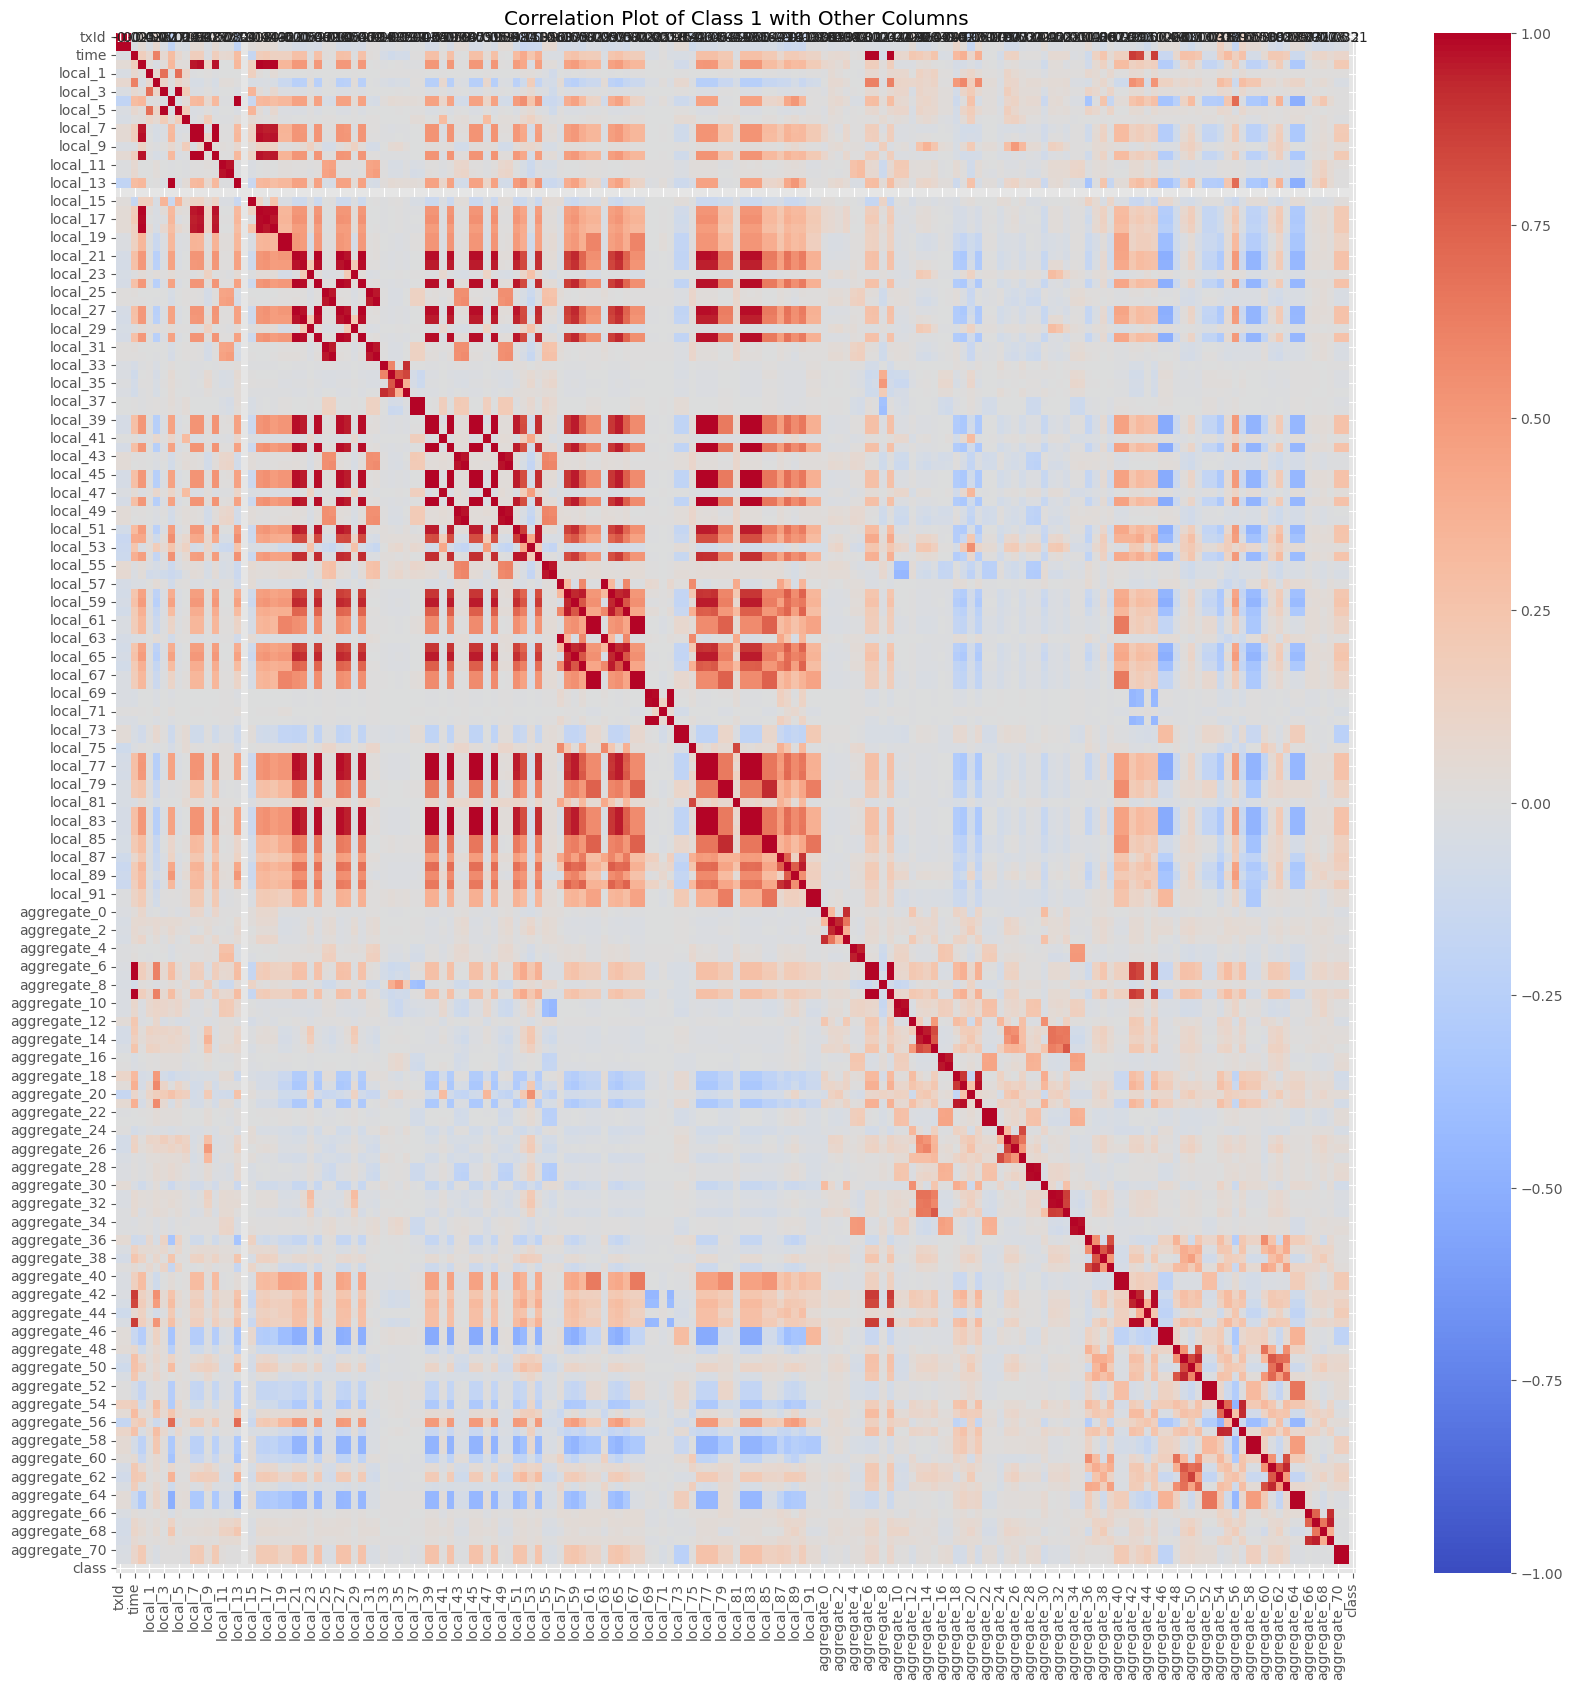

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to include only Class 1
class_1_data = classes_features[classes_features["class"] == 1]

# Compute the correlation matrix
correlation_matrix = class_1_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Plot of Class 1 with Other Columns')
plt.show()


In [48]:
# First, filter the data to exclude Class 0 and Class 2 as before
filtered_data = classes_features[(classes_features["class"] != 0) & (classes_features["class"] != 2)]

# Count the occurrences of each id at each Time
id_counts = filtered_data.groupby(['time', 'id']).size().reset_index(name='count')

# Find the maximum count for each Time
max_counts = id_counts.groupby('time')['count'].max().reset_index()

# Now let's display this as a table
print(max_counts)


    time  count
0    1.0      1
1    2.0      1
2    3.0      1
3    4.0      1
4    5.0      1
5    6.0      1
6    7.0      1
7    8.0      1
8    9.0      1
9   10.0      1
10  11.0      1
11  12.0      1
12  13.0      1
13  14.0      1
14  15.0      1
15  16.0      1
16  17.0      1
17  18.0      1
18  19.0      1
19  20.0      1
20  21.0      1
21  22.0      1
22  23.0      1
23  24.0      1
24  25.0      1
25  26.0      1
26  27.0      1
27  28.0      1
28  29.0      1
29  30.0      1
30  31.0      1
31  32.0      1
32  43.0      1
33  44.0      1
34  45.0      1
35  46.0      1
36  47.0      1
37  48.0      1
38  49.0      1


In [49]:
#Print all column names
print(classes_features.columns)

Index(['txId', 'id', 'time', 'local_0', 'local_1', 'local_2', 'local_3',
       'local_4', 'local_5', 'local_6',
       ...
       'aggregate_63', 'aggregate_64', 'aggregate_65', 'aggregate_66',
       'aggregate_67', 'aggregate_68', 'aggregate_69', 'aggregate_70',
       'aggregate_71', 'class'],
      dtype='object', length=169)


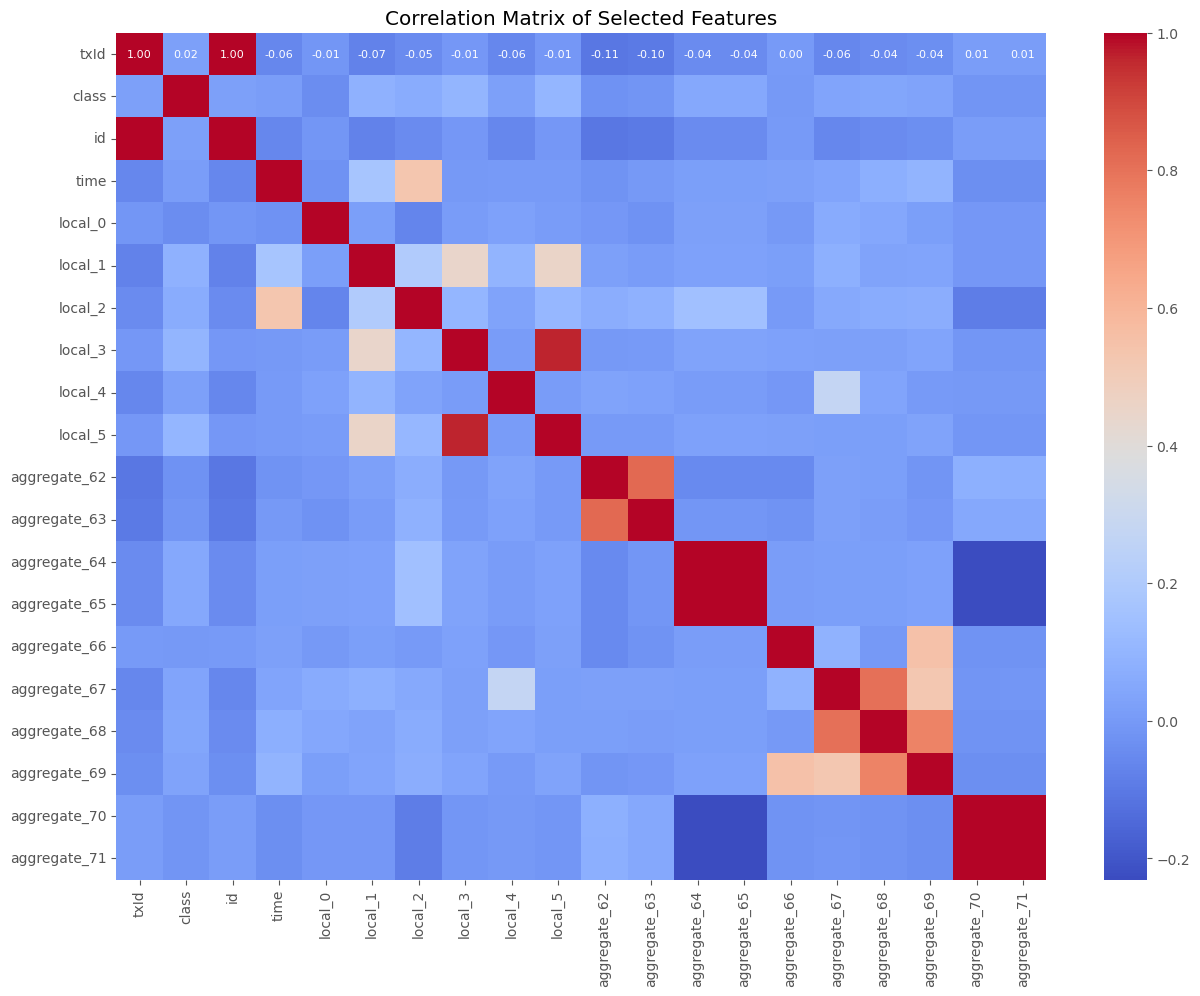

In [50]:
# Select relevant columns for correlation analysis
selected_columns = ['txId', 'class', 'id', 'time', 'local_0', 'local_1', 'local_2',
       'local_3', 'local_4', 'local_5',
       'aggregate_62', 'aggregate_63', 'aggregate_64', 'aggregate_65',
       'aggregate_66', 'aggregate_67', 'aggregate_68', 'aggregate_69',
       'aggregate_70', 'aggregate_71']  # Adjust as needed
data_subset = classes_features[selected_columns]

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Visualize correlation matrix
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Selected Features')
plt.show()

## Conclusion

From the plots shown above, there appears to be some correlation, yet visualizing it proves quite challenging.

## 6. Additional graphs to show some relations

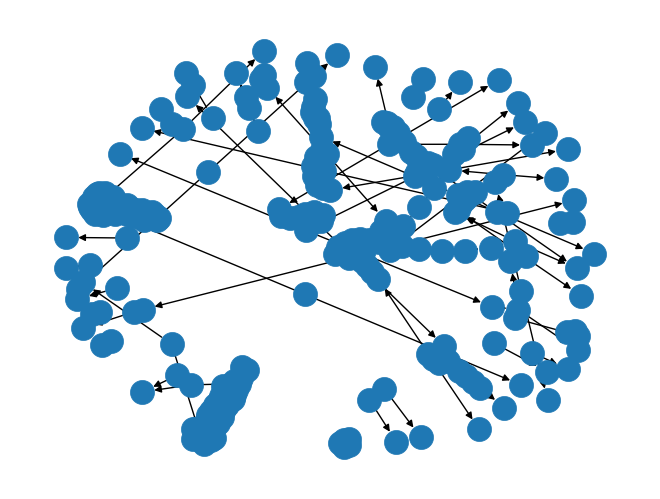

In [51]:
#Select illicit transactions at time step 20
illicit_ids = classes_features.loc[(classes_features['time'] == 32) & (classes_features['class'] == 1), 'txId']

#Select illicit edges
illicit_edges = dfEdgelist.loc[dfEdgelist['txId1'].isin(illicit_ids)]

#Create a directed graph from the illicit edges
graph = nx.from_pandas_edgelist(illicit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())

#Get the positions for nodes in the graph
pos = nx.spring_layout(graph)

#Plot the graph
nx.draw(graph, with_labels=False, pos=pos)

The resulting plot shows clusters of transactions that are connected to one another. The direction of the edges would indicate the flow. The clusters indicate groups of transactions that are related in some way, possibly being part of the same entities. The size and density of each cluster, as well as the thickness of the edges, can provide additional insights into the nature and volume of the illicit activities.

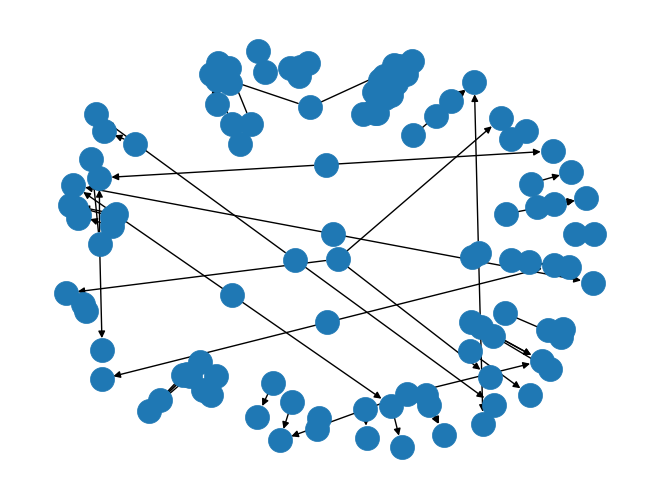

In [52]:
#Select illicit transactions at time step 20
illicit_ids = classes_features.loc[(classes_features['time'] == 27) & (classes_features['class'] == 2), 'txId']

#Select illicit edges
illicit_edges = dfEdgelist.loc[dfEdgelist['txId1'].isin(illicit_ids)]

#Create a directed graph from the illicit edges
graph = nx.from_pandas_edgelist(illicit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())

#Get the positions for nodes in the graph
pos = nx.spring_layout(graph)

#Plot the graph
nx.draw(graph, with_labels=False, pos=pos)

The resulting plot shows clusters of transactions that are connected to one another. The direction of the edges would indicate the flow. The clusters indicate groups of transactions that are related in some way, possibly being part of the same entities. The size and density of each cluster, as well as the thickness of the edges, can provide additional insights into the nature and volume of the illicit activities.

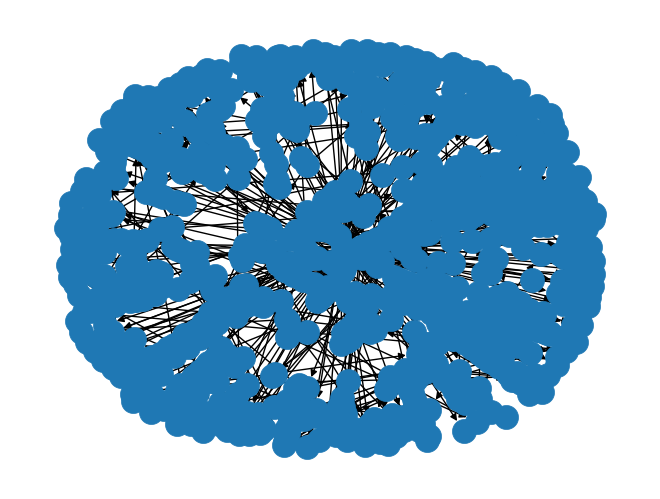

In [53]:
# Select illicit transactions at time step 20
illicit_ids = classes_features.loc[(classes_features['time'] == 27) & (classes_features['class'] == 0), 'txId']

# Select illicit edges
illicit_edges = dfEdgelist.loc[dfEdgelist['txId1'].isin(illicit_ids)]

# Create a directed graph from the illicit edges
graph = nx.from_pandas_edgelist(illicit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())

# Get the positions for nodes in the graph
pos = nx.spring_layout(graph)

# Draw the graph
nx.draw(graph, with_labels=False, pos=pos)

The resulting plot shows clusters of transactions that are connected to one another. The direction of the edges would indicate the flow. The clusters indicate groups of transactions that are related in some way, possibly being part of the same entities. The size and density of each cluster, as well as the thickness of the edges, can provide additional insights into the nature and volume of the illicit activities.

In [54]:
#Drop the rows with NaN values.
classes_features.dropna()

,txId,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
1,5530458,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
2,232022460,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
3,232438397,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
5,230459870,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,173077460.0,49.0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203765,158577750,158577750.0,49.0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
203766,158375402,158375402.0,49.0,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203767,158654197,158654197.0,49.0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0


In [55]:
#rename the columns
dfFeatures['txId']=dfFeatures['id']

In [56]:
selected_ids = classes_features.loc[(classes_features['class'] != 3), 'txId']
df_edges_selected = dfEdgelist.loc[dfEdgelist['txId1'].isin(selected_ids)]
df_classes_selected = dfClasses.loc[dfClasses['txId'].isin(selected_ids)]
df_features_selected = dfFeatures.loc[dfFeatures['id'].isin(selected_ids)]

# Merge Class and features
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected )
df_class_feature_selected.head()

,txId,class,id,time,local_0,local_1,local_2,local_3,local_4,local_5,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
0,5530458,unknown,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,unknown,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,unknown,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,unknown,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


## 7. Dimension Reduction 

In [57]:
# Separate columns containing 'local' and 'aggregate'
local_columns = [col for col in classes_features.columns if 'local' in col]
aggregate_columns = [col for col in classes_features.columns if 'aggregate' in col]

# Create new variables with the selected columns
df_local = classes_features[local_columns]
df_aggregate = classes_features[aggregate_columns]

In [58]:
import pandas as pd
import numpy as np
import scipy.stats as stats
# Select top 72 columns from df_local
df_local_subset = df_local.iloc[:, :72]

# Convert to numpy arrays
local = df_local_subset.values
aggregate = df_aggregate.values

# Check for infinite values
if np.any(np.isinf(local)):
    print("Infinite values found in local array")
if np.any(np.isinf(aggregate)):
    print("Infinite values found in aggregate array")

# Check for NaN values
if np.any(np.isnan(local)):
    print("NaN values found in local array")
if np.any(np.isnan(aggregate)):
    print("NaN values found in aggregate array")

#Remove rows with NaN values
local = local[~np.isnan(local).any(axis=1)]
aggregate = aggregate[~np.isnan(aggregate).any(axis=1)]

#Check shapes after removing NaN values
print("Shapes after removing NaN values:")
print(local.shape)  # (n_samples, 72)
print(aggregate.shape)  # (n_samples, 72)

#Perform Kruskal-Wallis test for each column
alpha = 0.1
p_values = []
for i in range(local.shape[1]):
    test_stat, p_val = stats.kruskal(local[:, i], aggregate[:, i])
    p_values.append(p_val)

#Now we have p-values for each column
for col, p_val in zip(df_local_subset.columns, p_values):
    print(f'Column "{col}": p-value = {p_val}')

Shapes after removing NaN values:
(160311, 72)
(160311, 72)
Column "local_0": p-value = 0.0
Column "local_1": p-value = 0.0
Column "local_2": p-value = 3.615075092599266e-20
Column "local_3": p-value = 0.0
Column "local_4": p-value = 0.0
Column "local_5": p-value = 0.0
Column "local_6": p-value = 0.0
Column "local_7": p-value = 0.0
Column "local_8": p-value = 0.0
Column "local_9": p-value = 0.0
Column "local_10": p-value = 0.0
Column "local_11": p-value = 0.0
Column "local_12": p-value = 0.0
Column "local_13": p-value = 0.0
Column "local_14": p-value = 0.0
Column "local_15": p-value = 0.0
Column "local_16": p-value = 0.0
Column "local_17": p-value = 0.0
Column "local_18": p-value = 5.830991066244038e-267
Column "local_19": p-value = 0.0
Column "local_20": p-value = 0.0
Column "local_21": p-value = 0.0
Column "local_22": p-value = 0.0
Column "local_23": p-value = 0.0
Column "local_24": p-value = 0.0
Column "local_25": p-value = 0.0
Column "local_26": p-value = 0.0
Column "local_27": p-v

In [59]:
# Select top 72 columns from df_local
df_local_subset = df_local.iloc[:, :72]

# Convert to numpy arrays
local = df_local_subset.values
aggregate = df_aggregate.values

# Check for infinite values
if np.any(np.isinf(local)):
    print("Infinite values found in local array")
if np.any(np.isinf(aggregate)):
    print("Infinite values found in aggregate array")

# Check for NaN values
if np.any(np.isnan(local)):
    print("NaN values found in local array")
if np.any(np.isnan(aggregate)):
    print("NaN values found in aggregate array")

# Remove rows with NaN values
local = local[~np.isnan(local).any(axis=1)]
aggregate = aggregate[~np.isnan(aggregate).any(axis=1)]

# Perform Kruskal-Wallis test for each column
alpha = 0.1
p_values = []
for i in range(local.shape[1]):
    test_stat, p_val = stats.kruskal(local[:, i], aggregate[:, i])
    p_values.append(p_val)

# Create a DataFrame with p-values
df_p_values = pd.DataFrame({'Feature': df_local_subset.columns, 'p-value': p_values})

# Sort p-values for better visualization
df_p_values = df_p_values.sort_values(by='p-value')

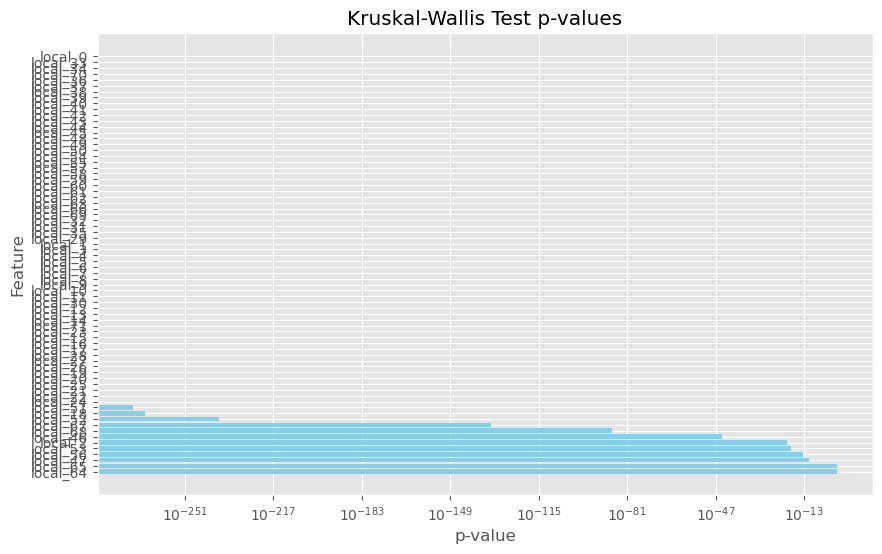

In [60]:
# Plot p-values
plt.figure(figsize=(10, 6))
plt.barh(df_p_values['Feature'], df_p_values['p-value'], color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('Kruskal-Wallis Test p-values')
plt.xscale('log')  # Using log scale for better visualization of small p-values
plt.gca().invert_yaxis()  # Invert y-axis to have higher p-values at the top
plt.show()


The graph is nearly illegible, but some p-values are discernible.

In [62]:
df_local.dropna()
df_aggregate.dropna()

,aggregate_0,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
1,-0.170113,-0.202332,-0.116817,-0.192405,-0.014659,-0.018849,-1.457921,-1.494024,-0.083459,-1.485939,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,-0.170528,-0.202658,-0.116817,-0.192811,-0.014659,-0.018849,-1.457953,-1.494057,-0.083459,-1.485972,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,-0.171098,0.266450,0.159432,-0.159946,0.970465,1.928382,-1.457953,-1.493992,-0.083124,-1.485957,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,-0.162974,0.844932,1.723414,0.440298,1.214440,1.049649,-1.460035,-1.494122,-0.070389,-1.486470,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,-0.162974,0.530794,1.169424,0.365016,0.722615,0.829625,-1.458209,-1.494122,-0.082342,-1.486063,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,-0.152429,-0.188449,-0.116817,-0.175101,-0.014659,-0.018849,1.641230,1.657409,-0.083459,1.656925,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,0.622034,0.419553,-0.116817,0.582730,-0.014659,-0.018849,1.641166,1.657344,-0.083459,1.656860,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,-0.171045,0.000997,0.307001,-0.096389,-0.352626,-1.294417,1.640461,1.656628,-0.083459,1.656145,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,-0.171000,-0.203028,-0.116817,-0.193272,-0.014659,-0.018849,1.641262,1.657442,-0.083459,1.656957,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


## 7.1 Base Model (Logistic Regression) before we start with actual feature reduction

In [65]:
#Make a copy of the classes_features DataFrame to avoid modifying the original data
LogisticRegressiondf = classes_features.copy()  
LogisticRegressiondf

,txId,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
1,5530458,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
2,232022460,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
3,232438397,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
5,230459870,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,173077460.0,49.0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203765,158577750,158577750.0,49.0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
203766,158375402,158375402.0,49.0,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203767,158654197,158654197.0,49.0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0


In [66]:
#Drop the 0 in LogisticRegressiondf
LogisticRegressiondf = LogisticRegressiondf[LogisticRegressiondf['class'] != 0]
#drop txId	id	time
LogisticRegressiondf = LogisticRegressiondf.drop(['txId', 'id', 'time'], axis=1)
LogisticRegressiondf

,local_0,local_1,local_2,local_3,local_4,local_5,local_6,local_7,local_8,local_9,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
3,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
9,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
10,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
16,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203752,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,2
203754,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,2
203759,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203763,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2


In [67]:
#From LogisticRegressiondf drop the class column and assign it to X, and assign the class column to y.
X = LogisticRegressiondf.drop(['class'], axis=1)
y = LogisticRegressiondf['class']
#Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#Identify columns in X_train
train_columns = X_train.columns

train_columns

# nsure X_test contains only the columns present in X_train, in the same order
X_test = X_test[train_columns]

In [69]:
# Import necessary modules from sklearn for model training, evaluation, and utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np  # Make sure to import numpy for mean calculation

#LogisticRegressiondf is the dataset loaded into a pandas DataFrame
X = LogisticRegressiondf.drop('class', axis=1)  # Features: DataFrame without the target column
y = LogisticRegressiondf['class']               # Target: The column to predict

# Initialize Logistic Regression with L2 regularization, a standard regularization technique that helps to prevent overfitting 
# by adding the square of coefficient magnitudes to the loss function. The parameter C=1.0 controls the strength of regularization,
# with larger values leading to less regularization and a focus on fitting to the training data. The 'liblinear' solver is efficient
# for small datasets and binary classification, focusing on linear classifiers like logistic regression.
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Train the logistic regression model on the training data
model.fit(X_train, y_train)

# Predict on the validation set
# Convert the true labels to the same type as the predicted labels
y_val = y_val.astype(int)
y_test = y_test.astype(int)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Perform 5-fold cross-validation and print the average accuracy
# Note: It's more common to perform cross-validation before the train/test split to assess model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Average 5-Fold CV Score: ", np.mean(cv_scores))

# Evaluate the model's performance on the test set
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Detailed performance analysis
print("Accuracy Score:", accuracy_score(y_test, y_pred))  # Overall accuracy of the model


Average 5-Fold CV Score:  0.9654736842105262
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.67      0.64       974
           2       0.97      0.96      0.96      9965

    accuracy                           0.93     10939
   macro avg       0.79      0.82      0.80     10939
weighted avg       0.94      0.93      0.93     10939

Accuracy Score: 0.9334491269768718


0.64 slechte score op de illicit predicten

In [70]:
#Perfom a grid search to find the best hyperparameters for the model
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['liblinear']  # Solver for optimization
}

# Initialize the logistic regression model
model = LogisticRegression()

# Initialize GridSearchCV with the necessary parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the search
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


          precision    recall  f1-score   support

           1       0.70      0.74      0.72       974
           2       0.97      0.97      0.97      9965

    accuracy                           0.95     10939
   macro avg       0.84      0.86      0.85     10939
weighted avg       0.95      0.95      0.95     10939

Accuracy Score: 0.9489898528201847

## 7.2 Feature reduction by using (VIF)

_Initially, we utilized the VIF method to reduce the features, but subsequently, we opted to use PCA. We made this decision because PCA is a powerful technique capable of identifying correlations between features and transforming them into a new set of linearly independent variables. As a result, it can significantly reduce the dimensionality of the data while preserving a large portion of the variance. With VIF, we were left with a significant reduction in the number of features._

This is why it's in markdowns!

In [71]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Step 1: Prepare the columns you want to check for multicollinearity
# columns_to_check = classes_features.columns[4:]  # Adjust as needed

# # Step 2: Extract the data of these columns
# data_to_check = classes_features[columns_to_check]

# # Step 3: Handle missing values
# data_to_check = data_to_check.dropna()

# # Step 4: Create a DataFrame to store VIF results
# vif_data = pd.DataFrame()
# vif_data["Feature"] = columns_to_check
# vif_data["VIF"] = [variance_inflation_factor(data_to_check.values, i) for i in range(len(columns_to_check))]

# # Step 5: Display the VIF results
# print(vif_data)

In [72]:
# sorted_vif_data = vif_data.sort_values(by='VIF', ascending=False)

# # Print the sorted DataFrame
# print(sorted_vif_data)

In [73]:
# # Set a threshold for VIF
# threshold = 10  # Adjust this threshold based on your preference

# # Filter features with VIF exceeding the threshold
# high_vif_features = sorted_vif_data[sorted_vif_data['VIF'] > threshold]['Feature'].tolist()

# # Remove high VIF features from your original DataFrame
# reduced_features_df = classes_features.drop(columns=high_vif_features)

# # Display the reduced DataFrame
# print(reduced_features_df)

In [74]:
#Print the dataset
classes_features

,txId,id,time,local_0,local_1,local_2,local_3,local_4,local_5,local_6,...,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71,class
1,5530458,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
2,232022460,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
3,232438397,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
5,230459870,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,173077460.0,49.0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203765,158577750,158577750.0,49.0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
203766,158375402,158375402.0,49.0,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203767,158654197,158654197.0,49.0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0


## 7.3 Feature reduction by using (PCA)

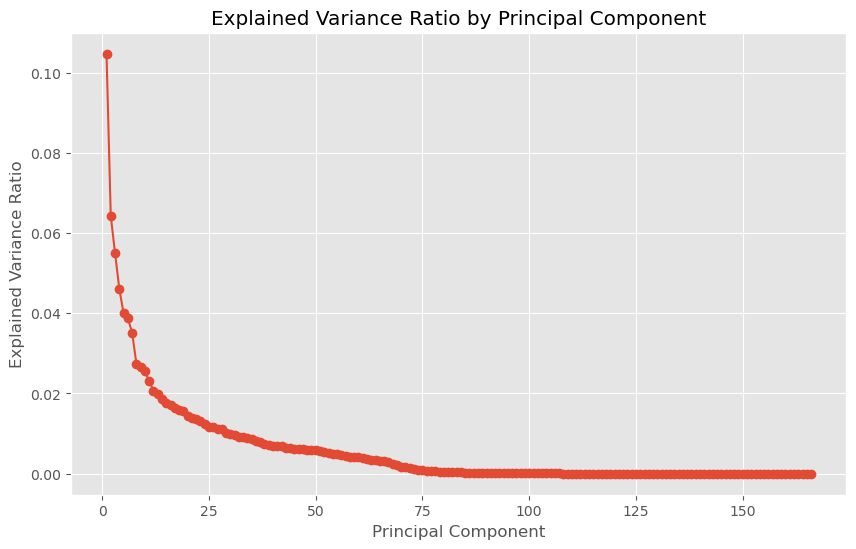

In [75]:
#Import the necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Drop the specified columns
columns_to_drop = ['txId', 'id', 'class']
classes_features_processed = classes_features.drop(columns_to_drop, axis=1)

# Standardize the features
scaler = StandardScaler()
classes_features_scaled = scaler.fit_transform(classes_features_processed)

# Apply PCA
pca = PCA()
pca.fit(classes_features_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# We can choose the number of components we want to keep based on explained variance
# For example, let's say we want to keep 95% of the variance
n_components = (cumulative_variance_ratio < 0.95).sum() + 1

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(classes_features_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

#Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()



From this plot, we can conclude that the first few principal components account for a significant portion of the variance within the dataset. Specifically, the first principal component explains the largest proportion of variance, with subsequent components explaining progressively less. The explained variance rapidly decreases after the first few components and levels off, indicating that the latter components contribute minimally to the variance in the data.

This typical scree plot suggests that a relatively small number of principal components might be sufficient to capture most of the variance in the data. This is useful for dimensionality reduction: by selecting only the first few principal components with the highest explained variance, one can reduce the complexity of the data without losing much information.

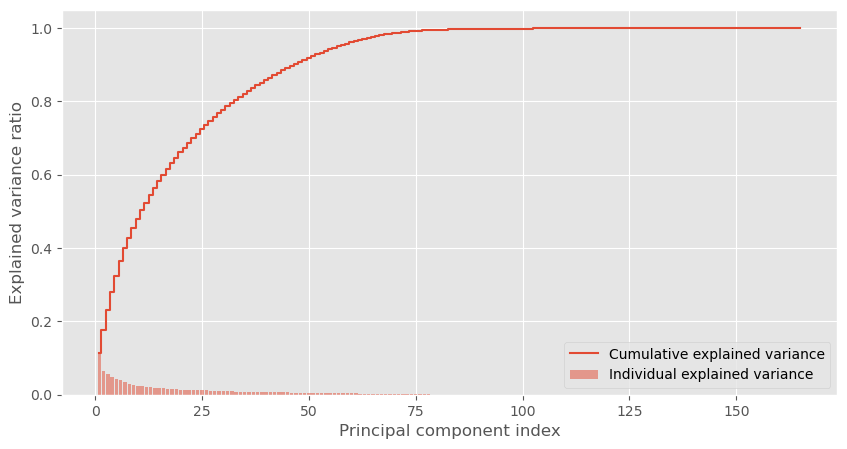

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop specified columns
columns_to_drop = ['txId', 'id', 'class', 'time']
PCA_features_df = classes_features.drop(columns_to_drop, axis=1)

# Initialize PCA
pca = PCA()

# Perform PCA transformation
pca_components = pca.fit_transform(PCA_features_df)

# Obtain variance explained ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variances
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


From the plot, it's clear that each additional principal component contributes less to the overall explained variance. The first few components explain a significant proportion of variance, as shown by the steep initial slope of the cumulative curve. As we move further along the principal component index, the slope of the cumulative curve flattens, indicating that each subsequent component adds less to the total explained variance.

The cumulative explained variance ratio approaches 1 (or 100%) as more components are added, indicating that all the variance in the data would be accounted for if all components were included. However, the goal of PCA is typically to reduce the dimensionality of the data while retaining as much variance as possible.

By examining where the cumulative curve starts to flatten out, we can determine the "elbow" of the plot, which is the point beyond which additional components contribute minimally to increasing the explained variance. This plot suggests that one might choose a number of components that capture a high percentage of the variance while ignoring the components with diminishing returns.

For example, if one were to choose a threshold of about 99% cumulative variance explained, we would select the number of components that correspond to this point on the cumulative curve. This could be around 70 components, as indicated by the plot. Selecting components up to this point would ensure that the dimensionality of the data is reduced without sacrificing a significant amount of information. 

In [77]:
# Setting a threshold for Explained Variance
var_exp_thres = 0.99  # Desired threshold for explained variance (99% in this case)

# Creating a PCA (Principal Component Analysis) instance
# PCA is used for dimensionality reduction and capturing the most important features
pca = PCA(n_components=var_exp_thres)

# Fitting the PCA on the scaled data to transform it into principal components
# The transformed data will have reduced dimensions while explaining the specified variance threshold
pca_comps = pca.fit_transform(PCA_features_df)

# Printing the number of components required to explain the specified variance threshold
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres * 100, pca.n_components_))


Number of components to explain 99% variance is 73


In [78]:

#Here we can see which the most important features are
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = PCA_features_df.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)


The most important features are: ['local_59' 'local_17' 'aggregate_7' 'aggregate_19' 'local_49' 'local_80'
 'local_19' 'local_12' 'aggregate_31' 'aggregate_61' 'aggregate_16'
 'aggregate_16' 'local_47' 'aggregate_40' 'aggregate_25' 'local_90'
 'local_63' 'aggregate_29' 'aggregate_67' 'local_71' 'aggregate_39'
 'aggregate_11' 'local_71' 'local_3' 'aggregate_68' 'local_37'
 'aggregate_71' 'aggregate_60' 'aggregate_22' 'aggregate_2' 'local_74'
 'aggregate_1' 'aggregate_32' 'aggregate_36' 'aggregate_44' 'local_35'
 'aggregate_4' 'aggregate_4' 'aggregate_32' 'local_41' 'local_14'
 'aggregate_36' 'local_35' 'aggregate_17' 'local_69' 'local_69'
 'aggregate_58' 'local_69' 'aggregate_20' 'aggregate_13' 'local_87'
 'local_6' 'local_6' 'local_6' 'aggregate_50' 'local_20' 'aggregate_54'
 'local_9' 'local_15' 'local_15' 'local_53' 'aggregate_66' 'local_53'
 'local_91' 'local_1' 'local_78' 'aggregate_14' 'local_33' 'aggregate_48'
 'local_75' 'aggregate_67' 'local_2' 'local_18']


In [79]:
# Select the most important features from the PCA-transformed data
PCA_features_df = PCA_features_df[most_important_features]


In [80]:
#Show the dataset
PCA_features_df
#Check the shape 
PCA_features_df.shape

,local_59,local_17,aggregate_7,aggregate_19,local_49,local_80,local_19,local_12,aggregate_31,aggregate_61,...,local_91,local_1,local_78,aggregate_14,local_33,aggregate_48,local_75,aggregate_67,local_2,local_18
1,-0.163126,-0.171477,-1.494024,-1.267340,0.036577,-0.167165,0.887058,-0.035391,-0.143707,0.634272,...,-1.084907,-0.184668,-0.263753,-0.134546,-0.024669,-0.168742,-0.095403,-0.087490,-1.201369,-0.174490
2,-0.163101,-0.172217,-1.494057,-1.267340,0.036577,-1.470277,0.887058,-0.035391,-0.145126,0.407161,...,-1.084907,-0.184668,-0.262963,-0.134546,-0.024669,-0.168742,-0.095104,-0.106715,-1.201369,-0.175227
3,-0.163126,-0.172908,-1.493992,0.787435,-2.165534,-0.167165,-0.243300,2.397457,0.523326,-0.617907,...,0.025308,1.963790,0.707151,-0.082822,-0.024669,-0.163577,4.313295,0.085530,-0.646376,0.619399
4,-0.163094,-0.032930,-1.494122,-1.267340,-0.871028,-0.840727,0.065455,0.988902,-0.116742,-0.470592,...,-0.487315,-0.081127,-0.263750,-0.091258,-0.024669,-0.168742,-0.095403,0.277775,-1.201369,-0.042709
5,-0.163046,-0.010829,-1.494122,-1.267340,0.036577,-0.023612,-0.243639,0.517402,-0.116742,-0.446040,...,-0.205755,-0.081127,-0.263748,-0.112969,-0.024669,-0.168742,-0.095403,0.277775,-1.201369,-0.048401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,-0.163122,-0.154887,1.657409,0.273741,0.036577,-0.167165,0.887058,-0.035391,-0.143707,-0.617907,...,1.135523,-0.163752,-0.263753,-0.134546,-0.024669,-0.177903,-0.095403,-0.087490,0.463609,-0.144049
203765,-0.163122,-0.164770,1.657344,1.301128,0.036577,1.135947,0.887058,-0.035391,-0.038685,-0.010232,...,1.135523,-0.123607,-0.263711,-0.134546,-0.024669,-0.144378,-0.095403,-0.087490,1.018602,-0.167903
203766,-0.163122,-0.171905,1.656628,1.301128,-0.381571,1.135947,0.887058,-1.260748,-0.118161,1.401539,...,1.135523,-0.078182,-0.263662,0.009530,-0.024669,1.086992,-0.095403,-0.087490,1.018602,-0.175117
203767,-0.163126,-0.172744,1.657442,-0.239953,0.036577,-0.167165,0.887058,-0.035391,-0.143707,-0.446040,...,-1.084907,-0.176622,-0.263753,-0.134546,-0.024669,-0.169776,-0.095403,-0.087490,1.018602,-0.176097


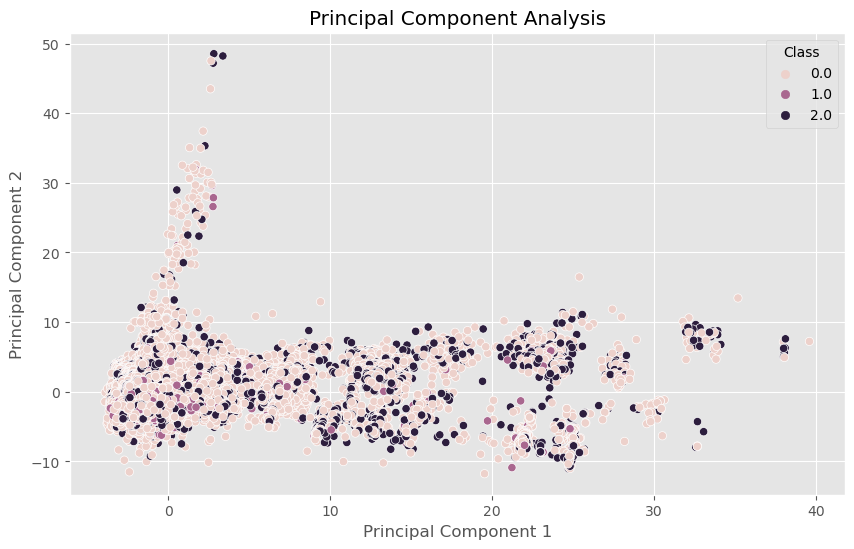

In [83]:
#Vizualize the pca test to see if the classes are seperated.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Plot the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=classes_features['class'])
plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.legend(title='Class')
plt.show()


The plot is a scatter plot from a Principal Component Analysis (PCA), plotting Principal Component 1 against Principal Component 2. Each point represents an observation in the dataset, and the color indicates the class to which each observation belongs (0.0, 1.0, or 2.0).

From this plot, we can draw several conclusions:

1. Separation of Classes: The PCA has projected the high-dimensional data into two dimensions, where we can see some degree of separation between classes. However, the separation is not perfect, suggesting that there is some overlap in the dataset characteristics of the different classes.

2. Variance Captured: Principal Component 1 (the x-axis) seems to capture more variance than Principal Component 2 (the y-axis), as indicated by the wider spread of data along the x-axis. This is consistent with the nature of PCA where the first principal component captures the most variance, and each subsequent component captures progressively less.

3. Class Distribution:

3a. Class 0.0 is somewhat separable from the other two classes along Principal Component 2, but there is overlap with classes 1.0 and 2.0.

3b. Class 1.0 and Class 2.0 are not clearly separable from each other in this two-dimensional PCA space, indicating that these classes share similar variance in the dimensions captured by Principal Components 1 and 2.

4. Outliers: There are a few potential outliers, particularly in Class 0.0, where some points are distant from the main cluster along Principal Component 2.

## 8. Clustering to predict the unknowns

In [84]:
# Import the necessary libraries
import pandas as pd


# Add 'txId', 'id', 'class' columns from classes_features to PCA_features_df
PCA_features_df = pd.concat([classes_features[['txId', 'id', 'class']], PCA_features_df], axis=1)

# Display the resulting DataFrame
PCA_features_df.head()



             txId           id  class  local_59  local_17  aggregate_7  \
1         5530458    5530458.0      0 -0.163126 -0.171477    -1.494024   
2       232022460  232022460.0      0 -0.163101 -0.172217    -1.494057   
3       232438397  232438397.0      2 -0.163126 -0.172908    -1.493992   
4       230460314  230460314.0      0 -0.163094 -0.032930    -1.494122   
5       230459870  230459870.0      0 -0.163046 -0.010829    -1.494122   
...           ...          ...    ...       ...       ...          ...   
203764  173077460  173077460.0      0 -0.163122 -0.154887     1.657409   
203765  158577750  158577750.0      0 -0.163122 -0.164770     1.657344   
203766  158375402  158375402.0      1 -0.163122 -0.171905     1.656628   
203767  158654197  158654197.0      0 -0.163126 -0.172744     1.657442   
203768  157597225  157597225.0      0 -0.159725  0.017213     1.657572   

        aggregate_19  local_49  local_80  local_19  ...  local_91   local_1  \
1          -1.267340  0.036577 -

In [86]:
#Rename the columns and drop the NaN values
Clustering_df = PCA_features_df
Clustering_df =Clustering_df.dropna()

In [88]:
Clustering_df1 = Clustering_df.copy()

In [90]:
# #To check how two clusters will perform, we did a silhoute score and davies bouldin index   
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score, davies_bouldin_score

# # Initialize KMeans with the desired number of clusters
# n_clusters = 2  # Adjust as needed
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # Fit the KMeans model
# kmeans.fit(Clustering_df1)

# # Get the cluster labels
# cluster_labels = kmeans.labels_

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(Clustering_df1, cluster_labels)

# # Print the silhouette score and Davies-Bouldin index
# print("Silhouette Score:", silhouette_avg)

The Silhouette score, used for evaluating the quality of clustering results. This score ranges between -1 and 1, where a score closer to 1 indicates well-separated clusters with higher quality. A score around 0 suggests potential overlaps between clusters, while negative values imply misassignments of clusters.

A score of 0.636 is generally quite good. It indicates that the clusters are reasonably well-separated and that the clustering exhibits a reasonable level of consistency.

In [91]:
#import the necessary libraries
import numpy as np
from sklearn.cluster import KMeans

#change the unkown in column class to 0
Clustering_df['class'].fillna(0, inplace=True)

#select the class 0 data
class_0_data = Clustering_df[Clustering_df['class'] == 0].drop(columns=['txId', 'id', 'class'])

#Choose a clustering algorithm and apply it to the selected data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(class_0_data)

#Assign the predicted clusters to classes 0 in the original DataFrame
predicted_clusters = kmeans.predict(class_0_data)

#Add the predicted clusters to the copy of the DataFrame
Clustering_df.loc[Clustering_df['class'] == 0, 'predicted_class'] = predicted_clusters + 1  # Voeg 1 toe om te compenseren voor 0-gebaseerde indexering van clusters

#results
print(Clustering_df[['class', 'predicted_class']].head())


c:\Users\Vic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   class  predicted_class
1      0              1.0
2      0              1.0
3      2              NaN
4      0              1.0
5      0              1.0


We can see that only the '0' in the column predicted_class is predicted and the classes 1,2 remain the same.

In [92]:
#If class is 0 then replace with predicted class in Clustering_df_copy
Clustering_df['class'] = np.where(Clustering_df['class'] == 0, Clustering_df['predicted_class'], Clustering_df['class'])

# Drop the 'predicted_class' column
Clustering_df = Clustering_df.drop('predicted_class', axis=1)

# Display the updated DataFrame
print(Clustering_df.head())



        txId           id  class  local_59  local_17  aggregate_7  \
1    5530458    5530458.0    1.0 -0.163126 -0.171477    -1.494024   
2  232022460  232022460.0    1.0 -0.163101 -0.172217    -1.494057   
3  232438397  232438397.0    2.0 -0.163126 -0.172908    -1.493992   
4  230460314  230460314.0    1.0 -0.163094 -0.032930    -1.494122   
5  230459870  230459870.0    1.0 -0.163046 -0.010829    -1.494122   

   aggregate_19  local_49  local_80  local_19  ...  local_91   local_1  \
1     -1.267340  0.036577 -0.167165  0.887058  ... -1.084907 -0.184668   
2     -1.267340  0.036577 -1.470277  0.887058  ... -1.084907 -0.184668   
3      0.787435 -2.165534 -0.167165 -0.243300  ...  0.025308  1.963790   
4     -1.267340 -0.871028 -0.840727  0.065455  ... -0.487315 -0.081127   
5     -1.267340  0.036577 -0.023612 -0.243639  ... -0.205755 -0.081127   

   local_78  aggregate_14  local_33  aggregate_48  local_75  aggregate_67  \
1 -0.263753     -0.134546 -0.024669     -0.168742 -0.095403    

In [93]:

#Check the distribution of the target classes in the dataset.
Clustering_df['class'].value_counts()


class
2.0    97228
1.0    63083
Name: count, dtype: int64

We can see that there are no 0 in the column class and we can see the distribution to check if its not to deviate. 

In [94]:
#Transform class to string
Clustering_df['class'] = Clustering_df['class'].astype(int)

In [95]:
#Make a copy from Clustering_df
Clustering_df_copy = Clustering_df.copy()

In [96]:
#Print the dataset
Clustering_df_copy

,txId,id,class,local_59,local_17,aggregate_7,aggregate_19,local_49,local_80,local_19,...,local_91,local_1,local_78,aggregate_14,local_33,aggregate_48,local_75,aggregate_67,local_2,local_18
1,5530458,5530458.0,1,-0.163126,-0.171477,-1.494024,-1.267340,0.036577,-0.167165,0.887058,...,-1.084907,-0.184668,-0.263753,-0.134546,-0.024669,-0.168742,-0.095403,-0.087490,-1.201369,-0.174490
2,232022460,232022460.0,1,-0.163101,-0.172217,-1.494057,-1.267340,0.036577,-1.470277,0.887058,...,-1.084907,-0.184668,-0.262963,-0.134546,-0.024669,-0.168742,-0.095104,-0.106715,-1.201369,-0.175227
3,232438397,232438397.0,2,-0.163126,-0.172908,-1.493992,0.787435,-2.165534,-0.167165,-0.243300,...,0.025308,1.963790,0.707151,-0.082822,-0.024669,-0.163577,4.313295,0.085530,-0.646376,0.619399
4,230460314,230460314.0,1,-0.163094,-0.032930,-1.494122,-1.267340,-0.871028,-0.840727,0.065455,...,-0.487315,-0.081127,-0.263750,-0.091258,-0.024669,-0.168742,-0.095403,0.277775,-1.201369,-0.042709
5,230459870,230459870.0,1,-0.163046,-0.010829,-1.494122,-1.267340,0.036577,-0.023612,-0.243639,...,-0.205755,-0.081127,-0.263748,-0.112969,-0.024669,-0.168742,-0.095403,0.277775,-1.201369,-0.048401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,173077460.0,2,-0.163122,-0.154887,1.657409,0.273741,0.036577,-0.167165,0.887058,...,1.135523,-0.163752,-0.263753,-0.134546,-0.024669,-0.177903,-0.095403,-0.087490,0.463609,-0.144049
203765,158577750,158577750.0,2,-0.163122,-0.164770,1.657344,1.301128,0.036577,1.135947,0.887058,...,1.135523,-0.123607,-0.263711,-0.134546,-0.024669,-0.144378,-0.095403,-0.087490,1.018602,-0.167903
203766,158375402,158375402.0,1,-0.163122,-0.171905,1.656628,1.301128,-0.381571,1.135947,0.887058,...,1.135523,-0.078182,-0.263662,0.009530,-0.024669,1.086992,-0.095403,-0.087490,1.018602,-0.175117
203767,158654197,158654197.0,2,-0.163126,-0.172744,1.657442,-0.239953,0.036577,-0.167165,0.887058,...,-1.084907,-0.176622,-0.263753,-0.134546,-0.024669,-0.169776,-0.095403,-0.087490,1.018602,-0.176097


## 9. Split (to get train and validation set)


In [97]:
#From Clustering_df_copy make a validation and training set.
X = Clustering_df_copy.drop(['class'], axis=1)
y = Clustering_df_copy['class']

#Split the data into training and validation sets (80% training, 20% validation)
X_fitting, X_val, y_fitting, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y
X_test = test.drop(['class', 'time'], axis=1)


In [98]:
#Print the dataset
X_test

,txId,id,local_0,local_1,local_2,local_3,local_4,local_5,local_6,local_7,...,aggregate_62,aggregate_63,aggregate_64,aggregate_65,aggregate_66,aggregate_67,aggregate_68,aggregate_69,aggregate_70,aggregate_71
130632,5684082,5684082.0,-0.092611,9.751945,2.128587,4.830506,4.898782,3.660799,0.851305,-0.163291,...,0.424676,0.011789,0.174974,0.189178,-0.098889,4.69940,0.910040,-0.029787,-0.175053,-0.088554
130633,94688302,94688302.0,-0.172609,-0.093552,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.163261,...,-0.420167,0.010822,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
130634,92491023,92491023.0,-0.152878,-0.042062,1.018602,-0.121970,0.015676,-0.113002,-0.061584,-0.143072,...,-0.577099,-0.613614,0.241128,0.241406,-0.098889,-0.08749,-0.101758,-0.166441,-0.700552,-0.700041
130646,1127922,1127922.0,-0.122663,8.817268,2.128587,4.155168,4.898782,3.325350,0.242712,-0.163383,...,0.657398,0.601736,0.196920,0.201216,-0.098889,4.69940,0.904956,-0.044325,-0.097731,-0.150203
130647,95569699,95569699.0,-0.172735,-0.093552,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.163389,...,-0.517316,-0.525310,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174069,73269416,73269416.0,-0.172761,0.016946,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163413,...,0.035682,-0.096404,-0.979074,-0.978556,-0.098889,-0.08749,-0.084674,-0.140597,-1.760926,-1.760984
174072,73264627,73264627.0,-0.172981,0.016948,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163639,...,0.125358,0.042360,1.461330,1.461369,-0.098889,-0.08749,-0.084674,-0.140597,-1.760926,-1.760984
174080,73262069,73262069.0,-0.166681,0.016948,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157192,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
174081,71822792,71822792.0,-0.167077,-0.193365,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.157603,...,2.090743,1.638141,-0.979074,-0.978556,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792


In [99]:
#Make a copy of the dataset.
X_test_copy = X_test.copy()
X_test_copy

In [101]:
#Drop the id and txId columns
X_test_copy = X_test_copy.drop(['id', 'txId'], axis=1)

In [102]:
#Change the feature to the most important features
X_test_copy = X_test_copy[most_important_features]

In [103]:
#Join the dataframes on the index
X_test_copy = X_test_copy.join(X_test[['id', 'txId']], how='left')
X_test_copy

In [105]:
#Change the X_test to the new X_test_copy
X_test = X_test_copy
X_test

In [107]:
#Check the shape of the dataset
X.shape

(160311, 75)

Its a correct shape with reduced features!

In [108]:
#Check the shape of the dataset
y.shape

(160311,)

Its a correct shape with one column!

## 10. Modelling 

## 10.1 Random Forest Classifier

In [122]:
# Remove duplicate column labels
X_fitting = X_fitting.loc[:, ~X_fitting.columns.duplicated()]
X_val = X_val.loc[:, ~X_val.columns.duplicated()]
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Sort the column names in ascending order for each DataFrame
X_fitting = X_fitting.reindex(sorted(X_fitting.columns), axis=1)
X_val = X_val.reindex(sorted(X_val.columns), axis=1)
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_test = X_test.reindex(sorted(X_test.columns), axis=1)

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, train_test_split

# Convert column names to strings for X_fitting and X_val 
X_fitting.columns = X_fitting.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# 1. Fit the model on the fitting split
rf_classifier.fit(X_fitting, y_fitting)

# 2. Validate and optimize the model using GridSearchCV on the validation sets
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

# Print the best parameters found by GridSearch
print("Best parameters found by GridSearch:", grid_search.best_params_)

# 3. Train the optimized model on the entire train set with the best parameters
optimized_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=42)
optimized_rf_classifier.fit(X_train, y_train)

# 4. Test the final model on the test set
y_pred = optimized_rf_classifier.predict(X_test)
y_test = y_test.astype(int)  # Ensure y_test is of the correct type

# Calculate and print evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found by GridSearch: {'max_depth': 30, 'n_estimators': 300}
Precision: 0.8382107318249749
Recall: 0.9030075875308529
F1 Score: 0.8661336694014824


GridSearch Process: The GridSearch CV process involved fitting 5 folds for each of 12 different combinations of parameters, resulting in a total of 60 fits. This indicates a thorough search was conducted to find the optimal parameters for the model.

Best Parameters: The optimal parameters identified by GridSearchCV for the model were max_depth: None and n_estimators: 300. This suggests that allowing the trees in the ensemble to grow without restriction (max_depth: None) combined with a relatively high number of estimators (n_estimators: 300) results in the best performance for the given dataset and model configuration.

Model Performance Metrics:

Precision: The precision of 0.837 indicates that when the model predicts a positive class, it is correct about 83.7% of the time. This is important in scenarios where the cost of false positives is high.
Recall: The recall of 0.903 suggests that the model is able to identify 90.3% of all actual positive cases. High recall is particularly valuable in situations where missing a positive instance (false negative) is costly.
F1 Score: The F1 score, which balances precision and recall, is 0.866. This high F1 score indicates that the model achieves a good balance between precision and recall, making it robust for practical use if both false positives and false negatives carry significant cost.

## 10.2 Model 2 Extra Trees

In [127]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

# Initialize the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)

# 1. Fit the model on the fitting split
et_classifier.fit(X_fitting, y_fitting)

# 2. Validate and optimize the model using GridSearchCV on the validation sets
param_grid = {
    'n_estimators': [100, 200, 300],  # Example parameter: number of trees
    'max_depth': [None, 10, 20, 30],  # Example parameter: maximum depth of the tree
    # Add more parameters here based on your model's requirements
}
grid_search = GridSearchCV(et_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

# Print the best parameters found by GridSearch
print("Best parameters found by GridSearch:", grid_search.best_params_)

# 3. Train the optimized model on the entire train set with the best parameters
optimized_et_classifier = ExtraTreesClassifier(**grid_search.best_params_, random_state=42)
optimized_et_classifier.fit(X_train, y_train)

# 4. Test the final model on the test set
y_pred = optimized_et_classifier.predict(X_test)
y_test = y_test.astype(int)  # Ensure y_test is of the correct type

# Calculate and print evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found by GridSearch: {'max_depth': None, 'n_estimators': 100}
Precision: 0.8415862179115318
Recall: 0.8989852820184661
F1 Score: 0.8658099142039251


## 10.3 Model 3 Bagging

In [128]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier without fitting
bagging_classifier = BaggingClassifier(base_estimator=dt_classifier, random_state=42)

# 1. Fit the model on the fitting split
bagging_classifier.fit(X_fitting, y_fitting)

# 2. (Optional) Validate and optimize the model using GridSearchCV on the validation sets
# Since BaggingClassifier might have fewer parameters to tune, this step could be optional or focused on specific parameters.
# Here's an example focusing on n_estimators.
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators
    # Add more parameters if needed
}
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

# Print the best parameters found by GridSearch
print("Best parameters found by GridSearch:", grid_search.best_params_)

# 3. Train the optimized model on the entire train set with the best parameters
optimized_bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    **grid_search.best_params_,
    random_state=42
)
optimized_bagging_classifier.fit(X_train, y_train)

# 4. Test the final model on the test set
y_pred = optimized_bagging_classifier.predict(X_test)
y_test = y_test.astype(int)  # Ensure y_test is of the correct type

# Calculate and print evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

c:\Users\Vic\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\Vic\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Best parameters found by GridSearch: {'n_estimators': 100}


c:\Users\Vic\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Precision: 0.8598475896131167
Recall: 0.904104579943322
F1 Score: 0.8734240013630198


## 10.4 Model 4 Adaboost

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

# Initialize the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)

# 1. Fit the model on the fitting split
ada_classifier.fit(X_fitting, y_fitting)

# 2. Validate and optimize the model using GridSearchCV on the validation sets
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'learning_rate': [0.01, 0.1, 1]  # Learning rate shrinks the contribution of each classifier
    # Add more parameters if needed
}
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

# Print the best parameters found by GridSearch
print("Best parameters found by GridSearch:", grid_search.best_params_)

# 3. Train the optimized model on the entire train set with the best parameters
optimized_ada_classifier = AdaBoostClassifier(
    **grid_search.best_params_,
    random_state=42
)
optimized_ada_classifier.fit(X_train, y_train)

# 4. Test the final model on the test set
y_pred = optimized_ada_classifier.predict(X_test)
y_test = y_test.astype(int)  # Ensure y_test is of the correct type

# Calculate and print evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found by GridSearch: {'learning_rate': 1, 'n_estimators': 200}
Precision: 0.8501716528584026
Recall: 0.8954200566779413
F1 Score: 0.8683652766928909


## 10.5 Model 5 Gradient boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# 1. Fit the model on the fitting split
gb_classifier.fit(X_fitting, y_fitting)

# 2. Validate and optimize the model using GridSearchCV on the validation sets
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
    # You can add more parameters here based on your needs
}
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

# Print the best parameters found by GridSearch
print("Best parameters found by GridSearch:", grid_search.best_params_)

# 3. Train the optimized model on the entire train set with the best parameters
optimized_gb_classifier = GradientBoostingClassifier(
    **grid_search.best_params_,
    random_state=42
)
optimized_gb_classifier.fit(X_train, y_train)

# 4. Test the final model on the test set
y_pred = optimized_gb_classifier.predict(X_test)
y_test = y_test.astype(int)  # Ensure y_test is of the correct type

# Calculate and print evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found by GridSearch: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Precision: 0.858795567565187
Recall: 0.904287412012067
F1 Score: 0.8728533757208232


## 10.6 Model 6 K-Nearest neighbours

In [134]:
X_test.shape



(10939, 62)

In [135]:
y_test.shape

(10939,)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# 1. Fit the model on the fitting split
# Assuming X_fitting and y_fitting are properly defined
knn_classifier.fit(X_fitting, y_fitting)

# 2. Validate and optimize the model using GridSearchCV on the validation sets
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    # Add more parameters here if needed
}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

# Print the best parameters found by GridSearch
print("Best parameters found by GridSearch:", grid_search.best_params_)

# 3. Train the optimized model on the entire train set with the best parameters
optimized_knn_classifier = KNeighborsClassifier(**grid_search.best_params_)
optimized_knn_classifier.fit(X_train, y_train)

# Ensure X_test is in the correct format
if not isinstance(X_test, np.ndarray):
    X_test = X_test.values

# 4. Test the final model on the test set
y_pred = optimized_knn_classifier.predict(X_test)

# Ensure y_test is of the correct type
y_test = y_test.astype(int)

# Calculate and print evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found by GridSearch: {'n_neighbors': 9, 'weights': 'distance'}


c:\Users\Vic\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



Precision: 0.8339082045694992
Recall: 0.6230002742481031
F1 Score: 0.7033373591868622


## 10.7 Model 7 Ensemble (+600minutes)

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_fscore_support

# Definieer je base learners
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('et', ExtraTreesClassifier(random_state=42)),
    ('bagging_dt', BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression()

# Stel de stacking classifier samen
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Parameter grid voor GridSearchCV
# Let op: voor parameters van de base learners gebruik je de naam van de learner gevolgd door twee onderstrepingstekens en dan de parameter naam
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'et__n_estimators': [100, 200],
    'et__max_depth': [10, 20],
    'bagging_dt__n_estimators': [10, 20],
    'final_estimator__C': [0.1, 1.0, 10.0]  # Parameter voor de meta-learner (LogisticRegression)
}

# GridSearchCV
grid_search = GridSearchCV(estimator=stacking_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train met GridSearchCV
grid_search.fit(X_train, y_train)

# Beste parameters en score
print("Beste parameters:", grid_search.best_params_)
print("Beste score:", grid_search.best_score_)

# Voorspellingen maken met het beste model
y_pred = grid_search.predict(X_test)

# Evaluatiemetrieken berekenen
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

## 11 AUC graph 

In [ ]:
#Write the code to make an AUC Graph of all the models i used
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the classifiers
rf_classifier = RandomForestClassifier(random_state=42)
et_classifier = ExtraTreesClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=dt_classifier, n_estimators=10, random_state=42)
ada_classifier = AdaBoostClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Create a dictionary of classifiers
classifiers = {
    'Random Forest': rf_classifier,
    'Extra Trees': et_classifier,
    'Bagging': bagging_classifier,
    'AdaBoost': ada_classifier,
    'Gradient Boosting': gb_classifier,
    'K-Nearest Neighbors': knn_classifier
}

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot ROC curve for each classifier

for name, classifier in classifiers.items():
    classifier.fit(X, y)
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()



## 12 Conclusion

In conclusion, the bagging model performs best, achieving an F1 score of 0.87342. Notably, we use fewer features than mentioned in the referenced paper, yet we still attain a higher F1 score across the board. Additionally, we have employed semi-supervised learning and have applied various models.